In [1]:
from helpers import *
import numpy as np

In [2]:
data = get_data(5)
data[:10]

File already exist. Skipping download


['491,392 -> 34,392\n',
 '337,52 -> 485,52\n',
 '256,605 -> 256,959\n',
 '889,142 -> 153,878\n',
 '189,59 -> 512,382\n',
 '399,193 -> 598,193\n',
 '578,370 -> 795,153\n',
 '79,450 -> 569,450\n',
 '565,444 -> 270,149\n',
 '39,28 -> 39,846\n']

In [3]:
vals = [d.strip().split(' -> ') for d in data]
final = []
for v in vals:
    final.append([v[0].split(','), v[1].split(',')])
final = np.asarray(final, dtype=np.int16)
final[:5]

array([[[491, 392],
        [ 34, 392]],

       [[337,  52],
        [485,  52]],

       [[256, 605],
        [256, 959]],

       [[889, 142],
        [153, 878]],

       [[189,  59],
        [512, 382]]], dtype=int16)

In [4]:
max_x = np.amax(final[:,:,0]) + 1
max_y = np.amax(final[:,:,1]) + 1
max_x, max_y

(990, 991)

In [5]:
max_val = np.amax(final) + 1
max_val

991

In [6]:
from PIL import Image 
import matplotlib.pyplot as plt

img = Image.fromarray(np.zeros((max_val, max_val), dtype=np.int32), mode="F") 

In [7]:
#dda line algo
def draw_line(start, end):
    dx = end[0] - start[0] 
    dy = end[1] - start[1]  
    if abs(dx) > abs(dy):
        steps = abs(dx)
    else:
        steps = abs(dy) 
    x_inc = dx / steps 
    y_inc = dy / steps 
    for i in range(steps+1): 
        img.putpixel((round(start[0]), round(start[1])), 1) 
        start[0] += x_inc 
        start[1] += y_inc 

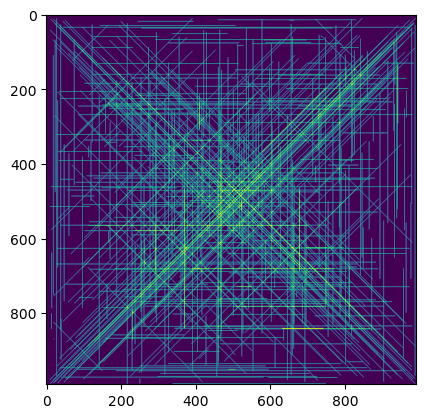

In [8]:
for line in final:
    l = line.copy()
    draw_line(l[0], l[1])
plt.imshow(np.array(img)) 
plt.show() 

In [9]:
grid = np.zeros((max_val, max_val), dtype=np.int8)

In [10]:
def draw_line_modiffied(start, end):
    dx = end[0] - start[0] 
    dy = end[1] - start[1]  
    if abs(dx) > abs(dy):
        steps = abs(dx)
    else:
        steps = abs(dy)
    x_inc = dx / steps 
    y_inc = dy / steps 
    for i in range(steps+1): 
        grid[start[0], start[1]] += 1
        start[0] += x_inc 
        start[1] += y_inc 

In [11]:
for line in final:
    l = line.copy()
    if l[0][0] == l[1][0] or l[0][1]== l[1][1]:
        draw_line_modiffied(l[0], l[1])

In [12]:
np.sum(grid > 1)

6856

<h3>Part2</h3>

In [13]:
for line in final:
    l = line.copy()
    if l[0][0] == l[1][0] or l[0][1]== l[1][1]:
        pass
    else:
        draw_line_modiffied(l[0], l[1])

In [14]:
np.sum(grid > 1)

20666

<h5>Something smells fishy</h5>
Results are OK but..